# Abstract

This is an NSGA-II implementation for Traveling Thief Problem that works ok for instances that have less than 23 items.

# Introduction

Traveling Thief Problem is one of the problems proposed in the competition from GECCO 2019 [[1]](https://www.egr.msu.edu/coinlab/blankjul/gecco19-thief/#polyakovskiy-2014-cbs-2576768-2598249). It is a combination of two single-objective optimization problems, Traveling Salesman Problem and Binary Knapsack
Problem. For implementation we made use of the NSGA-II multi-objective optimization algorithm. It stands for Non-dominated Sorting Genetic Algorithm. Uses elitism and it is characterized by ranking based on non dominated sorting fitness assignment and crowding distance diversity mechanism.

# Solution

## General Guideline

This are the general steps of processing an instances of the TTP problem:

1. Limit the seach space to allow only feasible solutions
2. random initialize a population $P$, that has fixed size $N$, with feasible solutions from the solution space
3. apply crossover and mutation to $P$ obtaining offspring $Q$, with the same size $N$
4. while termintation condition is not met
    5. obtain a reunion $R$ of parents $P$ and the offsrping $Q$
    6. Apply fast non-dominated sort on $R$ obtaining the sorted fronts $F_{1}$, $F_{2}$, ... $F_{k}$
    7. Add all the values from each front in the new population $P$ starting from $F_{1}$ as long as the $P$ size does not exceed $N$
    8. When you encounter an index $j$ s.t. not all values from $F_{j}$ can be added to $P$ without exceeding $N$ then you should select the $N - |P|$ solutions from $F_{j}$ that have the better crowding distance
    9. apply crossover and mutation to $P$ obtaining offspring $Q$, with the same size $N$
    10. go to step 3

## Implementation

At step 1 the hole $!(n - 1) * (2 ^ m)$ search space is limited by allowing only solutions that do not respect the max capacity constrain.

At step 2 a set of solutions from the limited search space is generated.

At step 3 and 9 there is applied, on solution's genotype:

- crossover of maximum two split points
- mutation on every gene of the genotype, with a given mutation rate

Steps 6, 7 and 8 are well depicted in [[2]](http://repository.ias.ac.in/83498/1/2-a.pdf) and [[3]](http://www.eng.auburn.edu/~aesmith/files/Multi-objective%20optimization%20using%20genetic%20algorithms.pdf).

There are three stages of reprezentations for a solution of the problem:

- the fenotype - the tour of the cities is reprezented as a permutation and the decisions of whether or not to steal an item on the tour is reprezented as a decision vector
- the genotype - both tour and decisions are reprezented as a hole vector of booleans
- the intermediate - tour and decisions are separated, both are reprezented by a huge integer



# Results

Here are the results for the toy example from [[4]](https://www.researchgate.net/publication/313841486_Solving_the_Bi-objective_Traveling_Thief_Problem_with_Multi-objective_Evolutionary_Algorithms). The plot depicts the evolution of the population in all 5 epochs, together with the pareto front each population.

Population size: 12


,Time,Profit,ParetoFront,Tour,Epoch
0,26.08,34,False,"([0, 2, 1, 3], [True, False, False])",2
1,27.36,40,True,"([0, 3, 2, 1], [False, True, False])",2
2,22.00,0,False,"([0, 3, 1, 2], [False, False, False])",2
3,25.26,25,False,"([0, 3, 2, 1], [False, False, True])",2
4,20.00,0,True,"([0, 3, 2, 1], [False, False, False])",2
5,38.91,74,True,"([0, 3, 2, 1], [True, True, False])",2
6,29.00,40,False,"([0, 1, 2, 3], [False, True, False])",2
7,29.41,59,False,"([0, 3, 2, 1], [True, False, True])",2
8,55.74,74,False,"([0, 2, 1, 3], [True, True, False])",2
9,22.04,34,True,"([0, 3, 2, 1], [True, False, False])",2


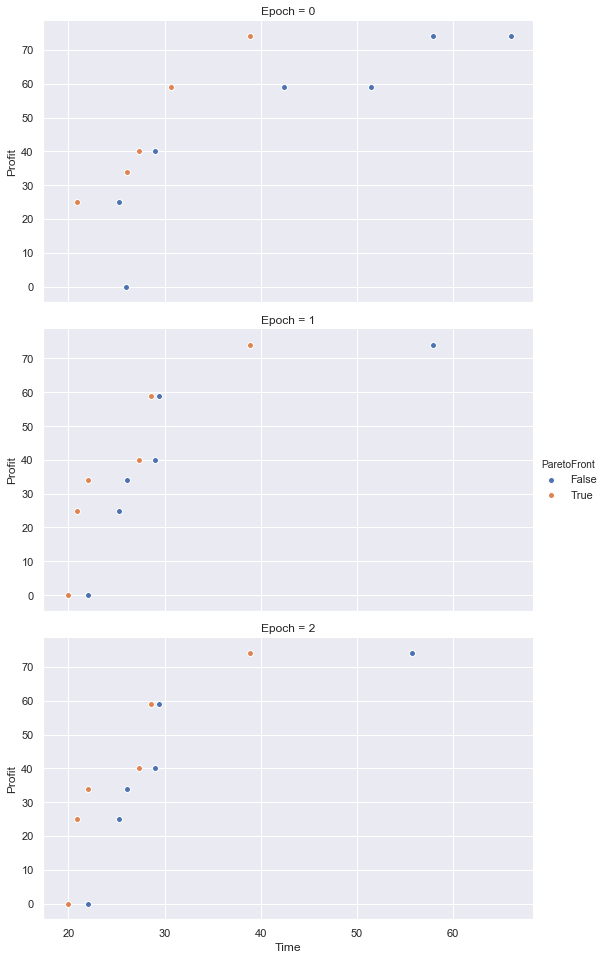

In [1]:
%matplotlib inline  
from utils import run_ndga, plot

output_path_generator = run_ndga('test-example-n4')
plot(list(output_path_generator))

Here is another example but for bigger instance. It has 20 cities and 20 items.

Population size: 154


,Time,Profit,ParetoFront,Tour,Epoch
0,1959.11,3346,False,"([0, 12, 6, 10, 1, 19, 17, 16, 15, 5, 14, 8, 1...",2
1,1844.19,3545,False,"([0, 17, 15, 4, 8, 18, 9, 7, 3, 11, 2, 5, 12, ...",2
2,4662.91,4074,False,"([0, 15, 10, 4, 14, 3, 5, 18, 2, 17, 16, 9, 11...",2
3,1320.81,2475,False,"([0, 19, 18, 10, 15, 3, 1, 5, 9, 12, 6, 17, 7,...",2
4,1629.09,3355,False,"([0, 10, 5, 14, 2, 3, 1, 12, 9, 6, 8, 4, 18, 1...",2
...,...,...,...,...,...
149,1334.94,3129,False,"([0, 17, 11, 18, 19, 15, 3, 7, 13, 5, 8, 1, 6,...",2
150,2059.15,3783,True,"([0, 4, 1, 16, 8, 15, 7, 14, 12, 10, 3, 6, 17,...",2
151,1389.75,3468,False,"([0, 5, 6, 9, 2, 12, 15, 19, 8, 13, 10, 7, 11,...",2
152,1145.65,1681,False,"([0, 18, 11, 13, 5, 1, 10, 4, 9, 19, 15, 2, 6,...",2


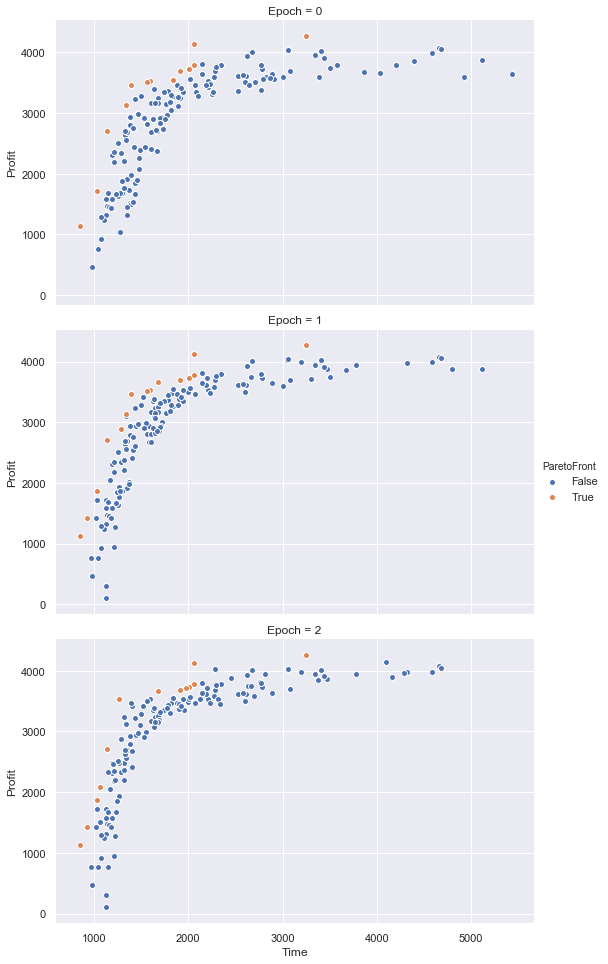

In [2]:
%matplotlib inline
from utils import run_ndga, plot

output_path_generator = run_ndga('a20-n20')
plot(list(output_path_generator))

# Conclusions

The current solution does not work for instances of TTP problems that have more than 23 items due to the search space limitation procedure bottleneck, which has an exponential time complexity relating the number of items. Another approach for handling the constrains was to assign to every infeasible solution a very large value for both objectives. This approach combined with the fact that the fast non dominated sorting algorithm has a time complexity of $2 * N^2$ - where $N$ is the population size - is problematic for big instances that have low capacity, the probability of generating feasible solutions in the initial populations becoming very low. 

# References

[[1]](https://www.egr.msu.edu/coinlab/blankjul/gecco19-thief/#polyakovskiy-2014-cbs-2576768-2598249) GECCO2019 Bi-objective Traveling Thief Competition


[[2]](http://repository.ias.ac.in/83498/1/2-a.pdf) A Fast Elitist Non-Dominated Sorting Genetic Algorithm for Multi-Objective Optimization: NSGA-II


[[3]](http://www.eng.auburn.edu/~aesmith/files/Multi-objective%20optimization%20using%20genetic%20algorithms.pdf) Multi-objective optimization using genetic algorithms: A tutorial

[[4]](https://www.researchgate.net/publication/313841486_Solving_the_Bi-objective_Traveling_Thief_Problem_with_Multi-objective_Evolutionary_Algorithms) Solving the Bi-Objective Traveling Thief
Problem with Multi-Objective Evolutionary
Algorithms